In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [41]:
preference10_df = pd.read_csv("cleaned_data/preference10-cleaned.csv")
preference25_df = pd.read_csv("cleaned_data/preference25-cleaned.csv")
preference50_df = pd.read_csv("cleaned_data/preference50-cleaned.csv")

def parse_column_to_list(df, column_name):
    return df[column_name].apply(eval)


for df in [preference10_df, preference25_df, preference50_df]:
    df['deltas'] = parse_column_to_list(df, 'deltas')
    df['accuracy'] = parse_column_to_list(df, 'accuracy')
    df['answers'] = parse_column_to_list(df, 'answers')
    df['time'] = parse_column_to_list(df, 'time')

    df['average_accuracy'] = df['accuracy'].apply(lambda x: sum(x) / len(x))

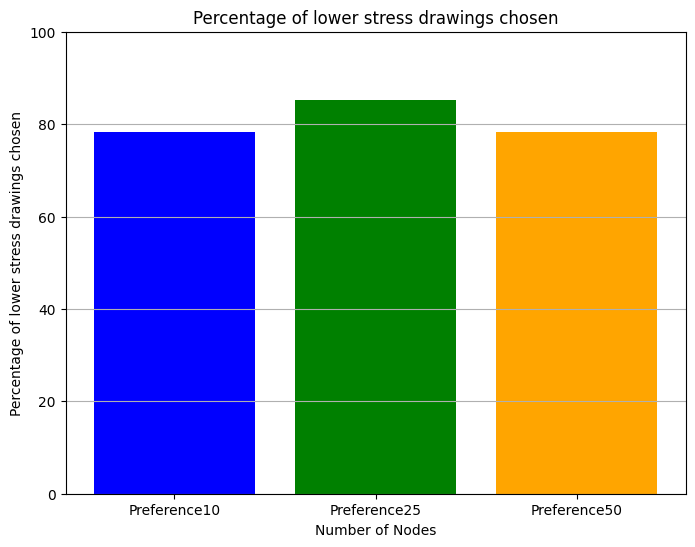

In [6]:
# Function to calculate the ratio of lower stress choices
def calculate_avg_lower_stress_chosen(df):
    def compute_ratio(accuracy):
        # Exclude same stress from the accuracy list
        filtered = [a for a in accuracy if a != -1]
        return sum(filtered) / len(filtered) if filtered else 0

    # Add the computed ratio as a new column
    df['avg_lower_stress_chosen'] = df['accuracy'].apply(compute_ratio)

# Apply the calculation to each dataset
for df in [preference10_df, preference25_df, preference50_df]:
    calculate_avg_lower_stress_chosen(df)


dataset_averages = {
    "Preference10": preference10_df['avg_lower_stress_chosen'].mean() * 100,
    "Preference25": preference25_df['avg_lower_stress_chosen'].mean() * 100,
    "Preference50": preference50_df['avg_lower_stress_chosen'].mean() * 100,
}

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(dataset_averages.keys(), dataset_averages.values(), color=['blue', 'green', 'orange'])
plt.xlabel('Number of Nodes')
plt.ylabel('Percentage of lower stress drawings chosen')
plt.title('Percentage of lower stress drawings chosen')
plt.ylim(0, 100)  # Add some padding above the highest bar
plt.grid(axis='y')

# Show the chart
plt.show()


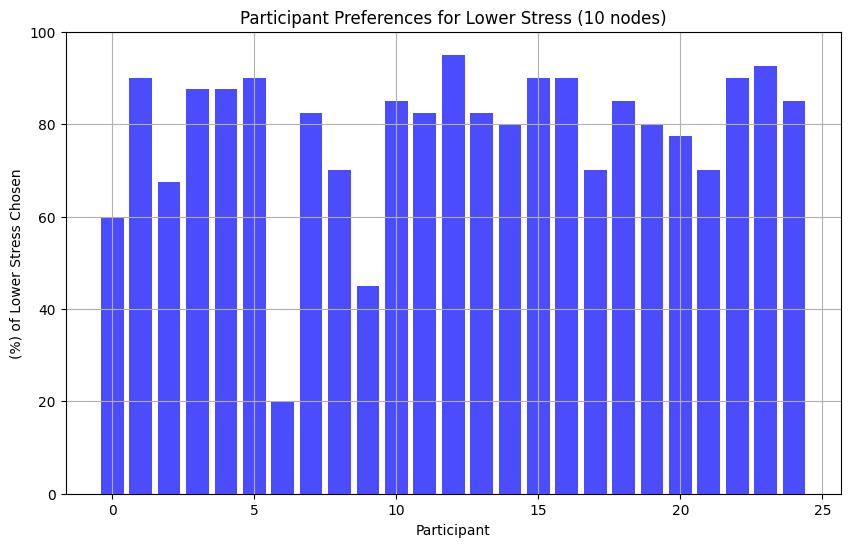

In [7]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.bar(preference10_df.index, preference10_df['avg_lower_stress_chosen'] * 100, color='blue', alpha=0.7)

# Add labels and titles
plt.xlabel('Participant')
plt.ylabel('(%) of Lower Stress Chosen')
plt.title('Participant Preferences for Lower Stress (10 nodes)')
plt.ylim(0,100)
plt.grid(True)

# Show the plot
plt.show()

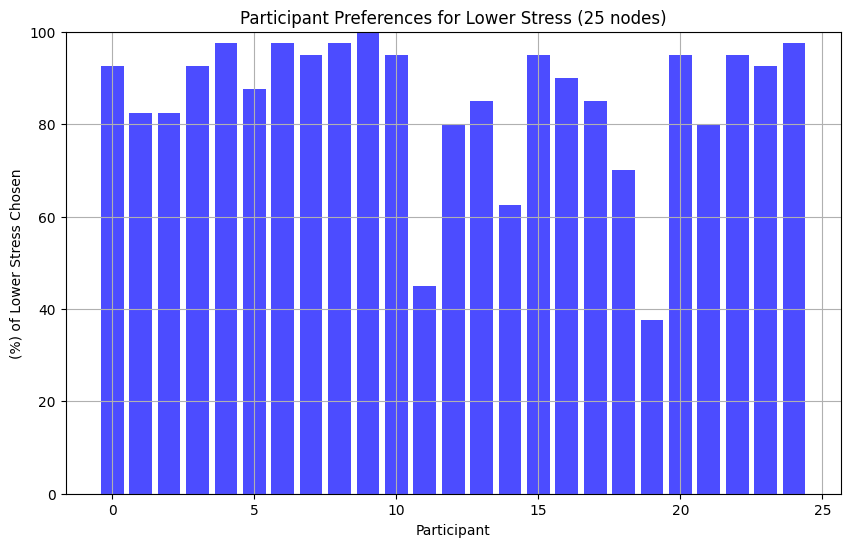

In [8]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.bar(preference10_df.index, preference25_df['avg_lower_stress_chosen'] * 100, color='blue', alpha=0.7)

# Add labels and titles
plt.xlabel('Participant')
plt.ylabel('(%) of Lower Stress Chosen')
plt.title('Participant Preferences for Lower Stress (25 nodes)')
plt.ylim(0,100)
plt.grid(True)

# Show the plot
plt.show()

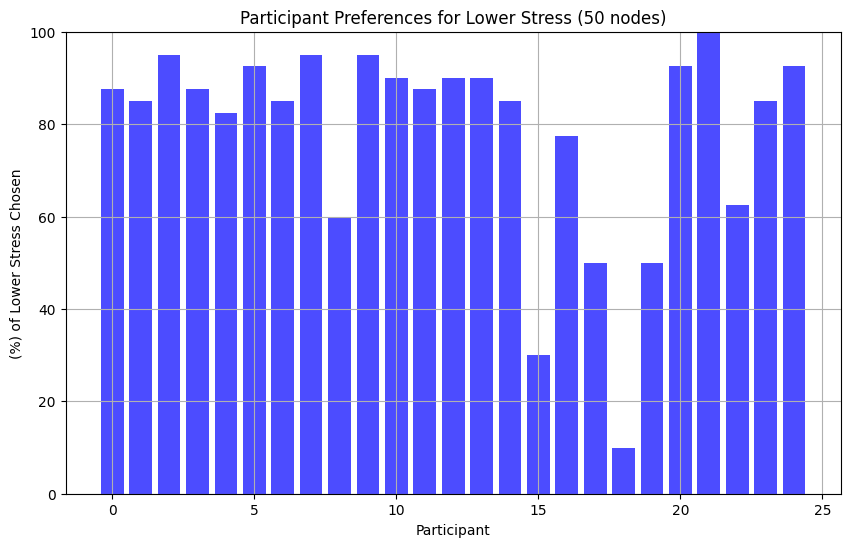

In [9]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.bar(preference10_df.index, preference50_df['avg_lower_stress_chosen'] * 100, color='blue', alpha=0.7)

# Add labels and titles
plt.xlabel('Participant')
plt.ylabel('(%) of Lower Stress Chosen')
plt.title('Participant Preferences for Lower Stress (50 nodes)')
plt.ylim(0,100)
plt.grid(True)

# Show the plot
plt.show()

## Exclude delta <=0.05

In [10]:
# Create a new accuracy column filtered by delta
def filter_accuracy_by_delta(df):
    def filter_row(deltas, accuracy):
        # Filter out values where delta <= 0.05
        filtered_accuracy = [a for d, a in zip(deltas, accuracy) if d > 35]
        print(len(filtered_accuracy))
        return filtered_accuracy

    # Apply the filtering row by row
    df['filtered_accuracy'] = [
        filter_row(deltas, accuracy) for deltas, accuracy in zip(df['deltas'], df['accuracy'])
    ]

# Apply the filtering function to the preference10 dataset
filter_accuracy_by_delta(preference10_df)
filter_accuracy_by_delta(preference25_df)
filter_accuracy_by_delta(preference50_df)




5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


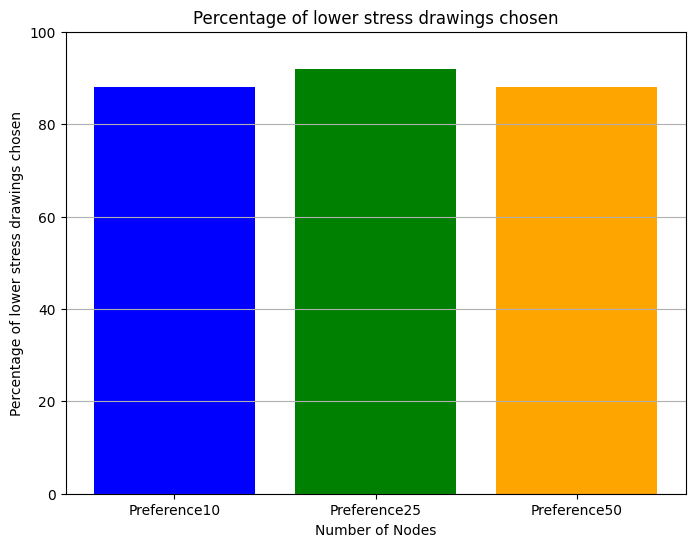

In [11]:
# Function to calculate the ratio of lower stress choices
def calculate_avg_lower_stress_chosen(df):
    def compute_ratio(accuracy):
        # Exclude same stress from the accuracy list
        filtered = [a for a in accuracy if a != -1]
        return sum(filtered) / len(filtered) if filtered else 0

    # Add the computed ratio as a new column
    df['filtered_avg_lower_stress_chosen'] = df['filtered_accuracy'].apply(compute_ratio)

# Apply the calculation to each dataset
for df in [preference10_df, preference25_df, preference50_df]:
    calculate_avg_lower_stress_chosen(df)


dataset_averages = {
    "Preference10": preference10_df['filtered_avg_lower_stress_chosen'].mean() * 100,
    "Preference25": preference25_df['filtered_avg_lower_stress_chosen'].mean() * 100,
    "Preference50": preference50_df['filtered_avg_lower_stress_chosen'].mean() * 100,
}

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(dataset_averages.keys(), dataset_averages.values(), color=['blue', 'green', 'orange'])
plt.xlabel('Number of Nodes')
plt.ylabel('Percentage of lower stress drawings chosen')
plt.title('Percentage of lower stress drawings chosen')
plt.ylim(0, 100)  # Add some padding above the highest bar
plt.grid(axis='y')

# Show the chart
plt.show()


# 10 node drawings choice

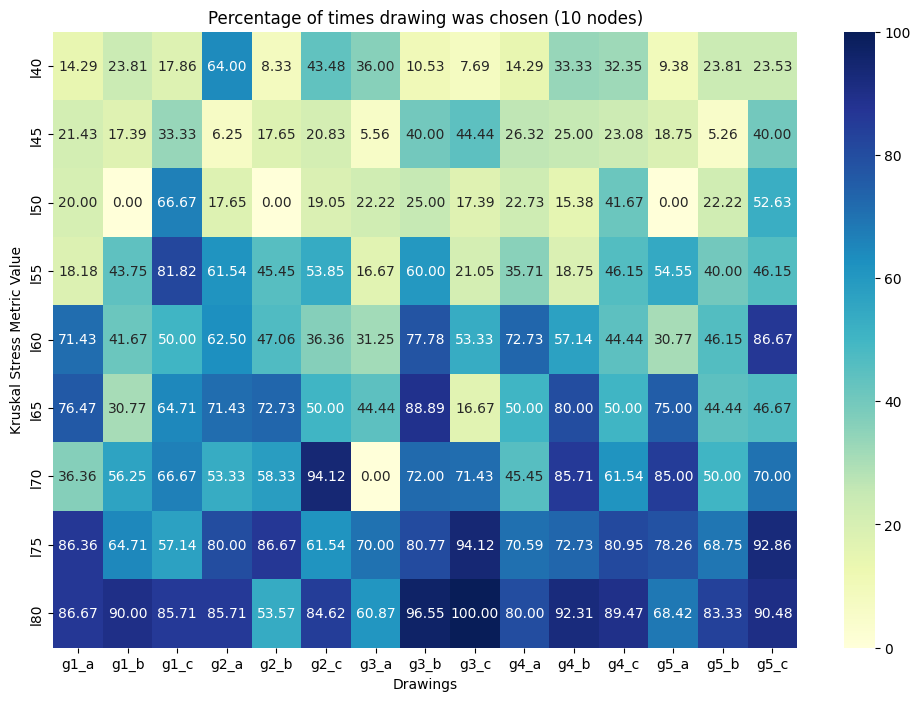

In [35]:
from collections import defaultdict

# Define the grid structure for the keys
g_values = [f"g{i}" for i in range(1, 6)]  # g1 to g5
l_values = [40, 45, 50, 55, 60, 65, 70, 75, 80]  # l40 to l80
ta_values = ["a", "b", "c"]  # a to c

# Generate all keys in the required format
keys = [f"{g}_l{l}_{ta}" for l in l_values for g in g_values for ta in ta_values]

# Create the nested dictionary structure
matrix_dict = {key: {"total": 0, "times_chosen": 0} for key in keys}

# dict(list(matrix_dict.items())[:10])  

for index, row in preference10_df.iterrows():
    drawings = eval(row['drawings'])  # Convert string to list of pairs

    for i, pair in enumerate(drawings):
        # Update the 'total' for both drawings in the pair
        for drawing in pair:
            matrix_dict[drawing]['total'] += 1

        # Update the 'times_chosen' for the selected drawing
        if row['answers'][i] == 1:
            matrix_dict[pair[0]]['times_chosen'] += 1  # First drawing selected
        elif row['answers'][i] == 2:
            matrix_dict[pair[1]]['times_chosen'] += 1  # Second drawing selected


# Initialize the matrix
heatmap_matrix = np.zeros((9, 15))  # 9 rows (l_values) x 15 columns (g_values x ta_values)

# Populate the matrix with ratio (times_chosen / total)
for i, l in enumerate(l_values):  # Rows correspond to l_values
    for j, g in enumerate(g_values):  # Loop through each g (g1, g2, etc.)
        for k, ta in enumerate(ta_values):  # Columns correspond to ta_values
            key = f"{g}_l{l}_{ta}"
            total = matrix_dict[key]['total']
            times_chosen = matrix_dict[key]['times_chosen']
            ratio = (times_chosen / total * 100) if total > 0 else 0
            heatmap_matrix[i, j * 3 + k] = ratio  # Assign to the correct column in the matrix

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu", 
    xticklabels=[f"{g}_{ta}" for g in g_values for ta in ta_values], 
    yticklabels=[f"l{l}" for l in l_values]
)
plt.xlabel("Drawings")
plt.ylabel("Kruskal Stress Metric Value")
plt.title("Percentage of times drawing was chosen (10 nodes)")
plt.show()

# 25 node drawings choice

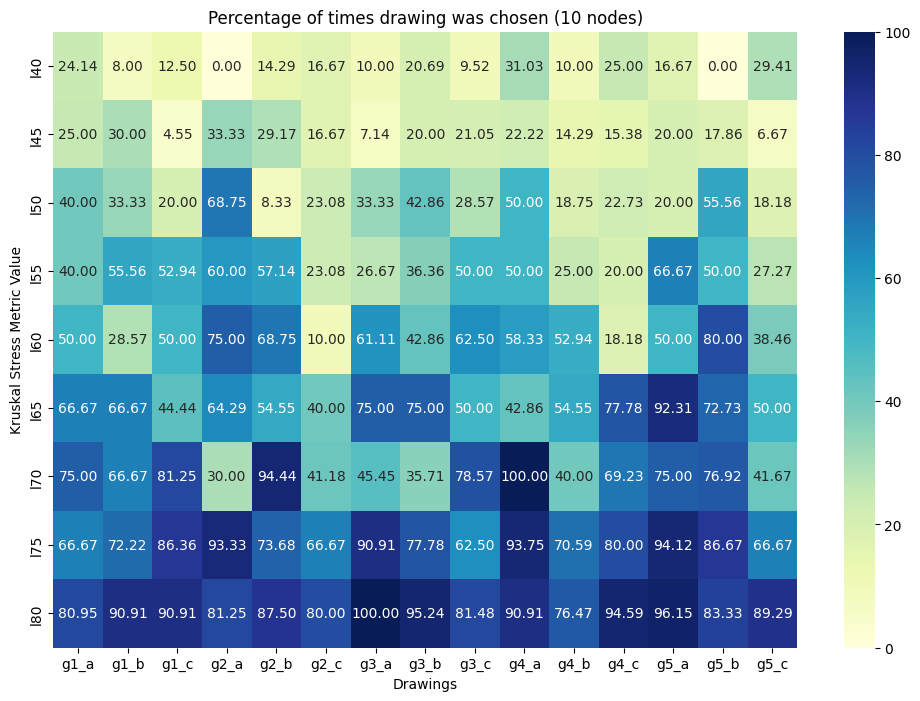

In [37]:
from collections import defaultdict

# Define the grid structure for the keys
g_values = [f"g{i}" for i in range(1, 6)]  # g1 to g5
l_values = [40, 45, 50, 55, 60, 65, 70, 75, 80]  # l40 to l80
ta_values = ["a", "b", "c"]  # a to c

# Generate all keys in the required format
keys = [f"{g}_l{l}_{ta}" for l in l_values for g in g_values for ta in ta_values]

# Create the nested dictionary structure
matrix_dict = {key: {"total": 0, "times_chosen": 0} for key in keys}

# dict(list(matrix_dict.items())[:10])  

for index, row in preference25_df.iterrows():
    drawings = eval(row['drawings'])  # Convert string to list of pairs

    for i, pair in enumerate(drawings):
        # Update the 'total' for both drawings in the pair
        for drawing in pair:
            matrix_dict[drawing]['total'] += 1

        # Update the 'times_chosen' for the selected drawing
        if row['answers'][i] == 1:
            matrix_dict[pair[0]]['times_chosen'] += 1  # First drawing selected
        elif row['answers'][i] == 2:
            matrix_dict[pair[1]]['times_chosen'] += 1  # Second drawing selected


# Initialize the matrix
heatmap_matrix = np.zeros((9, 15))  # 9 rows (l_values) x 15 columns (g_values x ta_values)

# Populate the matrix with ratio (times_chosen / total)
for i, l in enumerate(l_values):  # Rows correspond to l_values
    for j, g in enumerate(g_values):  # Loop through each g (g1, g2, etc.)
        for k, ta in enumerate(ta_values):  # Columns correspond to ta_values
            key = f"{g}_l{l}_{ta}"
            total = matrix_dict[key]['total']
            times_chosen = matrix_dict[key]['times_chosen']
            ratio = (times_chosen / total * 100) if total > 0 else 0
            heatmap_matrix[i, j * 3 + k] = ratio  # Assign to the correct column in the matrix

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu", 
    xticklabels=[f"{g}_{ta}" for g in g_values for ta in ta_values], 
    yticklabels=[f"l{l}" for l in l_values]
)
plt.xlabel("Drawings")
plt.ylabel("Kruskal Stress Metric Value")
plt.title("Percentage of times drawing was chosen (10 nodes)")
plt.show()

# 50 node drawings choice

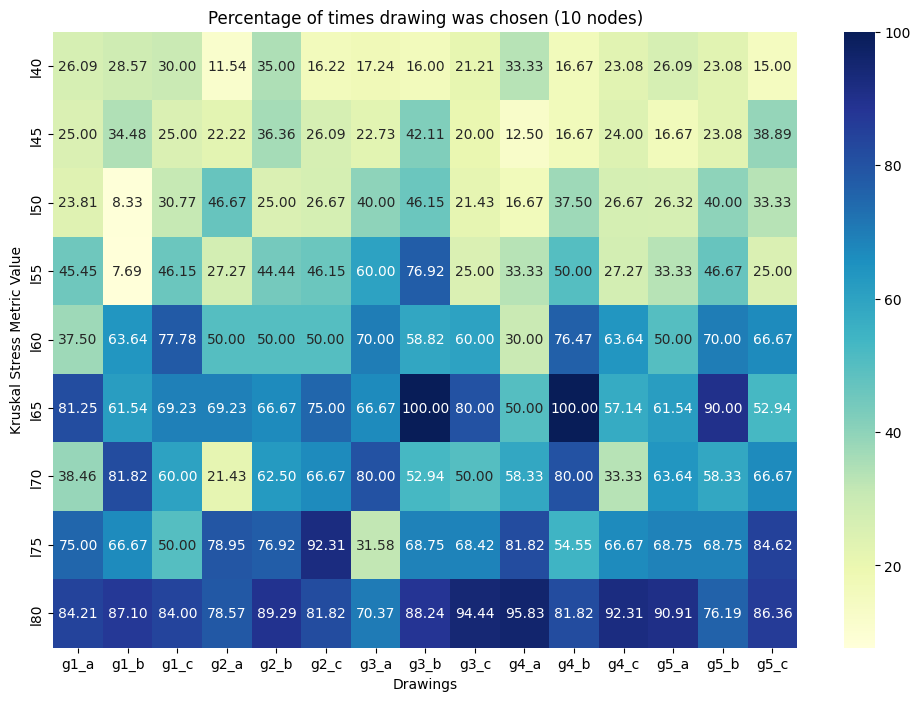

In [ ]:
from collections import defaultdict

# Define the grid structure for the keys
g_values = [f"g{i}" for i in range(1, 6)]  # g1 to g5
l_values = [40, 45, 50, 55, 60, 65, 70, 75, 80]  # l40 to l80
ta_values = ["a", "b", "c"]  # a to c

# Generate all keys in the required format
keys = [f"{g}_l{l}_{ta}" for l in l_values for g in g_values for ta in ta_values]

# Create the nested dictionary structure
matrix_dict = {key: {"total": 0, "times_chosen": 0} for key in keys}

# dict(list(matrix_dict.items())[:10])  

for index, row in preference50_df.iterrows():
    drawings = eval(row['drawings'])  # Convert string to list of pairs

    for i, pair in enumerate(drawings):
        # Update the 'total' for both drawings in the pair
        for drawing in pair:
            matrix_dict[drawing]['total'] += 1

        # Update the 'times_chosen' for the selected drawing
        if row['answers'][i] == 1:
            matrix_dict[pair[0]]['times_chosen'] += 1  # First drawing selected
        elif row['answers'][i] == 2:
            matrix_dict[pair[1]]['times_chosen'] += 1  # Second drawing selected


# Initialize the matrix
heatmap_matrix = np.zeros((9, 15))  # 9 rows (l_values) x 15 columns (g_values x ta_values)

# Populate the matrix with ratio (times_chosen / total)
for i, l in enumerate(l_values):  # Rows correspond to l_values
    for j, g in enumerate(g_values):  # Loop through each g (g1, g2, etc.)
        for k, ta in enumerate(ta_values):  # Columns correspond to ta_values
            key = f"{g}_l{l}_{ta}"
            total = matrix_dict[key]['total']
            times_chosen = matrix_dict[key]['times_chosen']
            ratio = (times_chosen / total * 100) if total > 0 else 0
            heatmap_matrix[i, j * 3 + k] = ratio  # Assign to the correct column in the matrix

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu", 
    xticklabels=[f"{g}_{ta}" for g in g_values for ta in ta_values], 
    yticklabels=[f"l{l}" for l in l_values]
)
plt.xlabel("Drawings")
plt.ylabel("Kruskal Stress Metric Value")
plt.title("Percentage of times drawing was chosen (50 nodes)")
plt.show()

In [ ]:
t_stat, p_value  = ttest_ind(preference10_df['average_accuracy'], preference50_df['average_accuracy'], equal_var=False)  # Welch's t-test

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -1.254269062064785
P-value: 0.2164253457693401
